In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import tensorflow as tf

In [93]:
df=pd.read_csv('mall-customers-data.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
print(df.corr(numeric_only=True))

                customer_id       age  annual_income  spending_score
customer_id        1.000000 -0.026763       0.977548        0.013835
age               -0.026763  1.000000      -0.012398       -0.327227
annual_income      0.977548 -0.012398       1.000000        0.009903
spending_score     0.013835 -0.327227       0.009903        1.000000


In [95]:
print(df.isna().sum())

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64


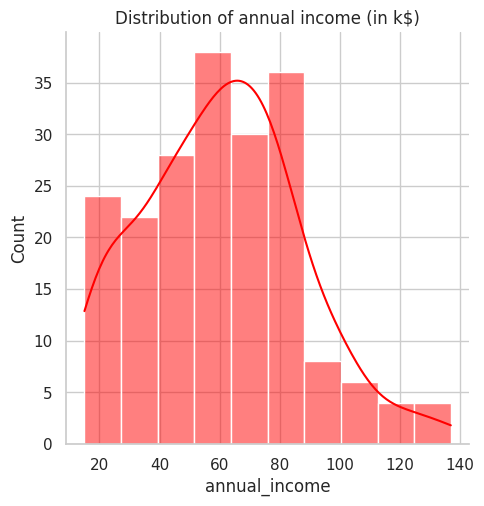

In [96]:
# Annual income Distribution:

sns.set(style="whitegrid")
sns.displot(df['annual_income'],kde=True,color='red')

plt.title('Distribution of annual income (in k$)')
plt.show()

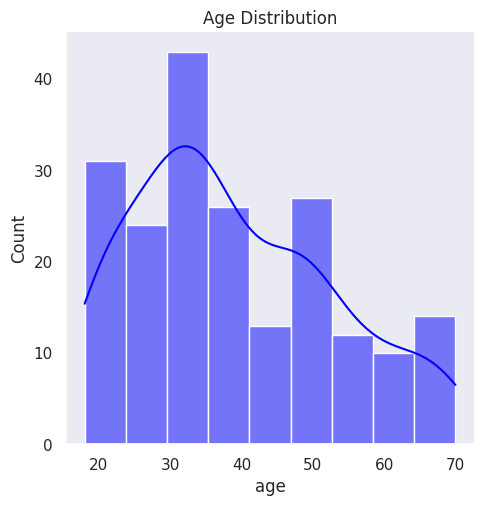

In [97]:
# Age distribution:
sns.set(style='dark')
sns.displot(df['age'],kde=True,color='blue')

plt.title('Age Distribution')
plt.show()

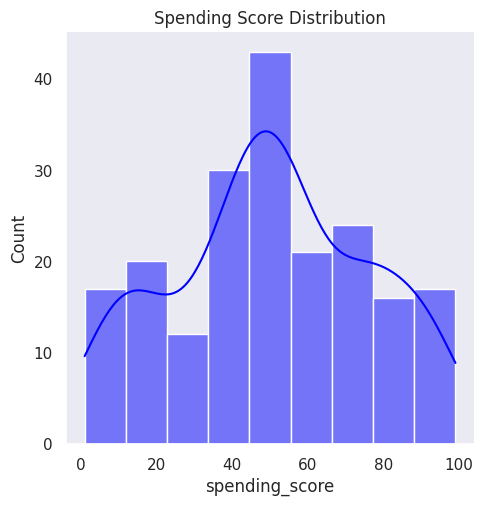

In [98]:
# Spending score distribution:
sns.set(style='dark')
sns.displot(df['spending_score'],kde=True,color='blue')

plt.title('Spending Score Distribution')
plt.show()

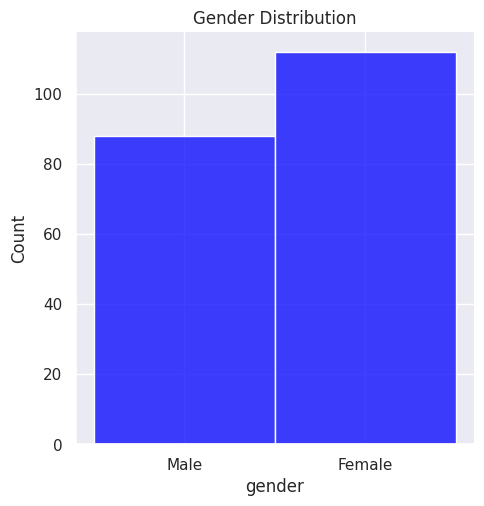

In [99]:
# Gender distribution:
sns.set(style='darkgrid')
sns.displot(df['gender'],color='blue')

plt.title('Gender Distribution')
plt.show()

In [100]:
x=df[['annual_income','spending_score']]
x.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


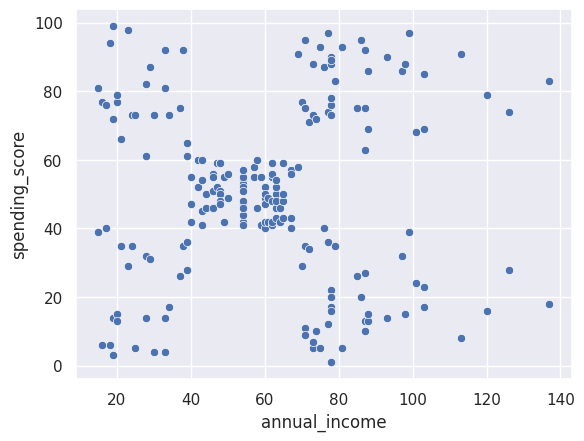

In [101]:
sns.scatterplot(x='annual_income',y='spending_score',data=x)
plt.show()


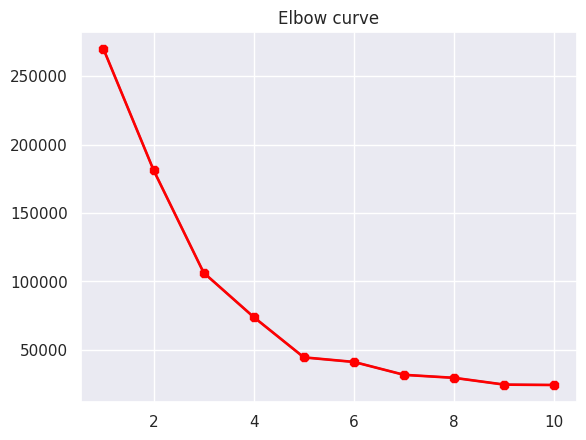

In [102]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,n_init='auto')
    k_means.fit(x)
    wcss.append(k_means.inertia_)


plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='red',linewidth='1.9',marker='8')

plt.title('Elbow curve')
plt.show()

In [103]:


# Taking k=5
k_means_1=KMeans(n_clusters=5,n_init="auto")

# Fitting the input data
k_means_1.fit(x)

# Predicting the labels of input data
y_pred=k_means_1.predict(x)

# Adding the labels to a column named label
df['label']=y_pred

df.head()

,customer_id,gender,age,annual_income,spending_score,label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


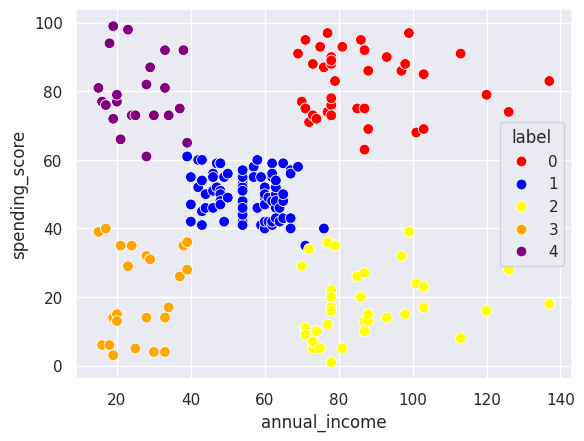

In [104]:
colors=['red','blue','yellow','orange','purple']
#Scatterplot of the clusters:

sns.scatterplot(x='annual_income',y='spending_score',hue='label',data=df,palette=colors,legend='full',s=60)

plt.show()

### Making Predictions on new Data:

   annual_income  spending_score  predicted_label
0             45              60                1
1             80              40                2
2            120              30                2
3             20              47                3


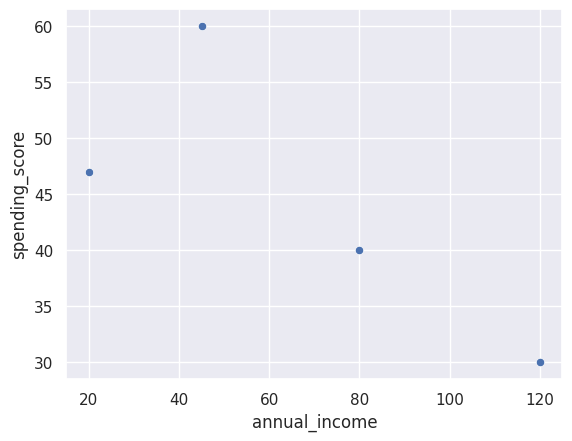

In [106]:
new_data = pd.DataFrame({
    'annual_income': [45, 80, 120,20],
    'spending_score': [60, 40, 30,47]
})

# Making sure the data has the same structure as the training data
new_data = new_data[['annual_income', 'spending_score']]

# Predicting the labels using the trained model
new_predictions = k_means_1.predict(new_data)

# Adding the predicted labels to the new_data DataFrame
new_data['predicted_label'] = new_predictions

# Displaying the results
print(new_data)

sns.scatterplot(x=new_data['annual_income'],y=new_data['spending_score'],data=x)
plt.show()
